In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Healthcare_ML_dataset.xlsx')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Removing duplicates

data = data.drop_duplicates()

In [6]:
#Treating missing values

print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


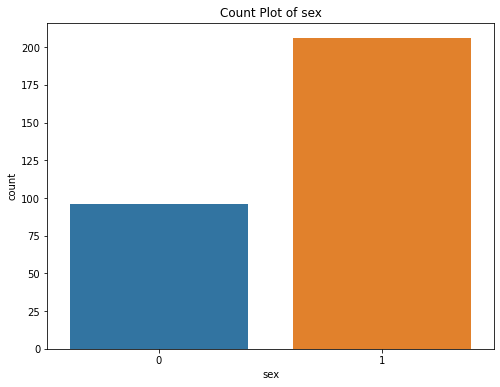

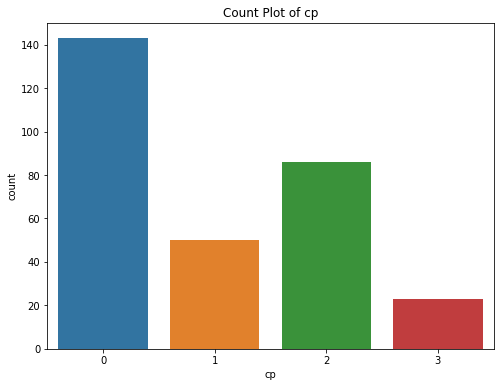

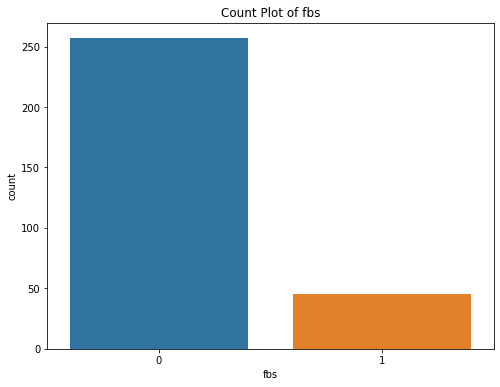

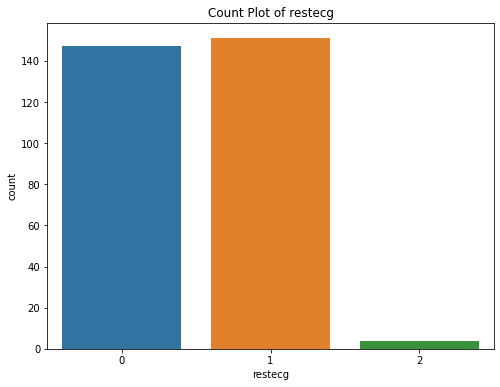

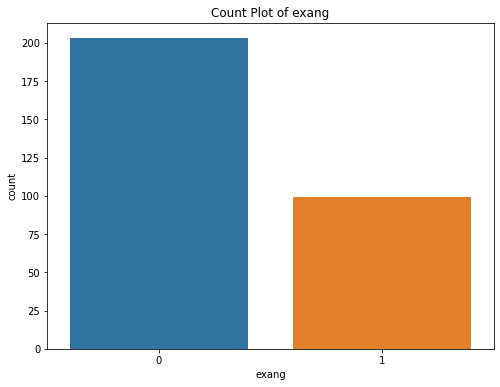

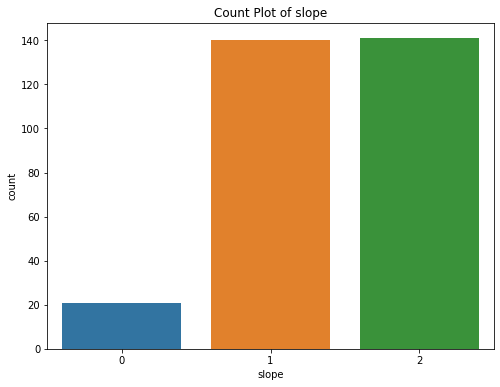

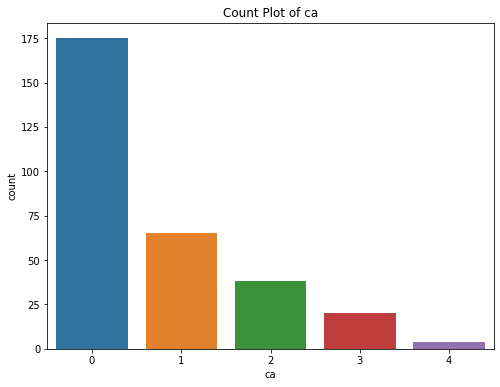

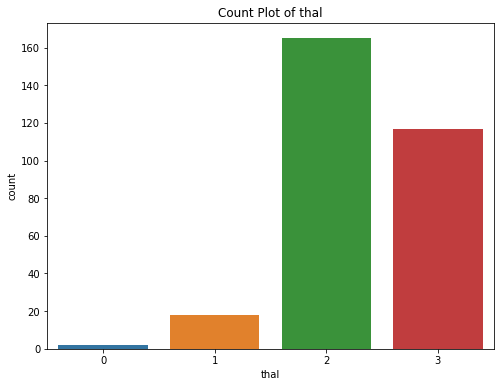

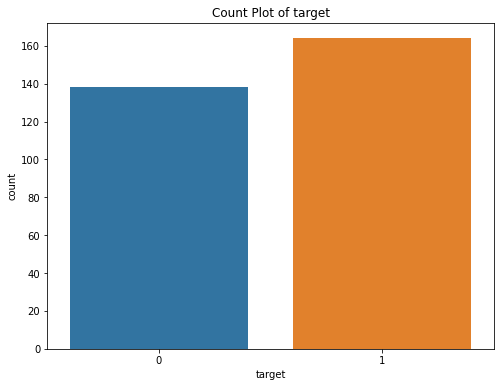

In [8]:

# Identifying categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Exploring categorical variables using count plots
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=data)
    plt.title(f'Count Plot of {var}')
    plt.show()


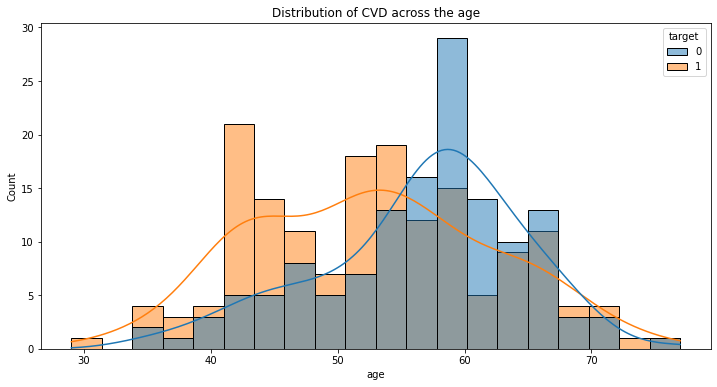

In [9]:
#Study the occurrence of CVD across the Age category.

plt.figure(figsize=(12, 6))
sns.histplot(x='age', hue='target', data=data, bins=20, kde=True)
plt.title('Distribution of CVD across the age')
plt.show()


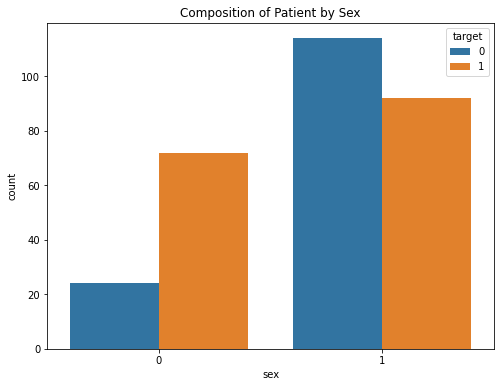

In [10]:
#Study the composition of all patients with respect to the Sex category.

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=data, )
plt.title('Composition of Patient by Sex')
plt.show()

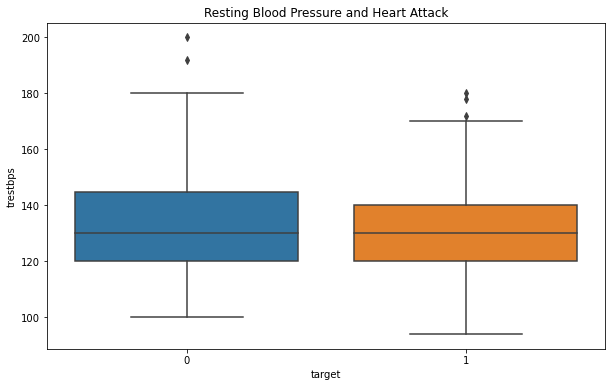

In [11]:
#Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient.

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=data)
plt.title('Resting Blood Pressure and Heart Attack')
plt.show()


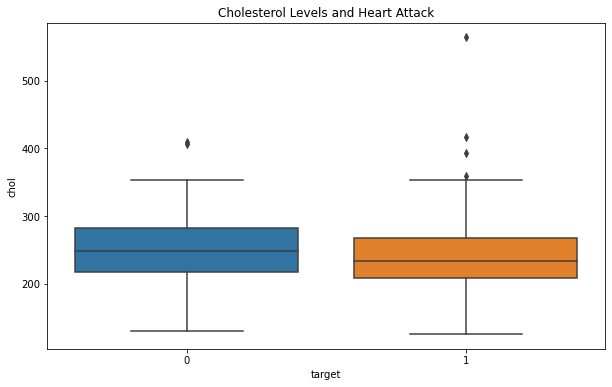

In [12]:
#Describe the relationship between cholesterol levels and the target variable.

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol Levels and Heart Attack')
plt.show()


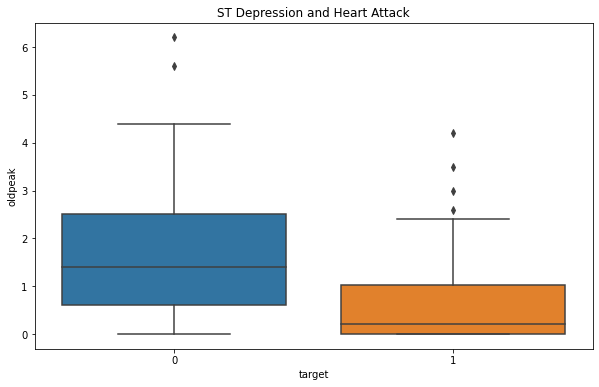

In [13]:
# State what relationship exists between peak exercising and the occurrence of a heart attack.

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='oldpeak', data=data)
plt.title('ST Depression and Heart Attack')
plt.show()


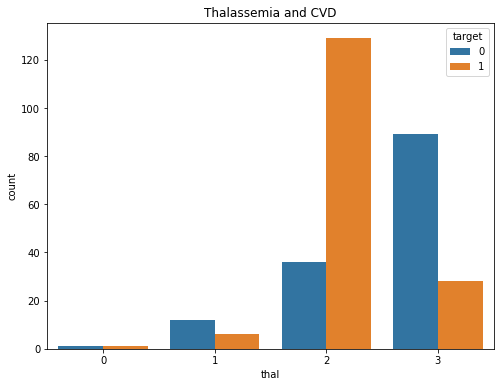

In [14]:
#Check if thalassemia is a major cause of CVD.

plt.figure(figsize=(8, 6))
sns.countplot(x='thal', data=data, hue='target')
plt.title('Thalassemia and CVD')
plt.show()


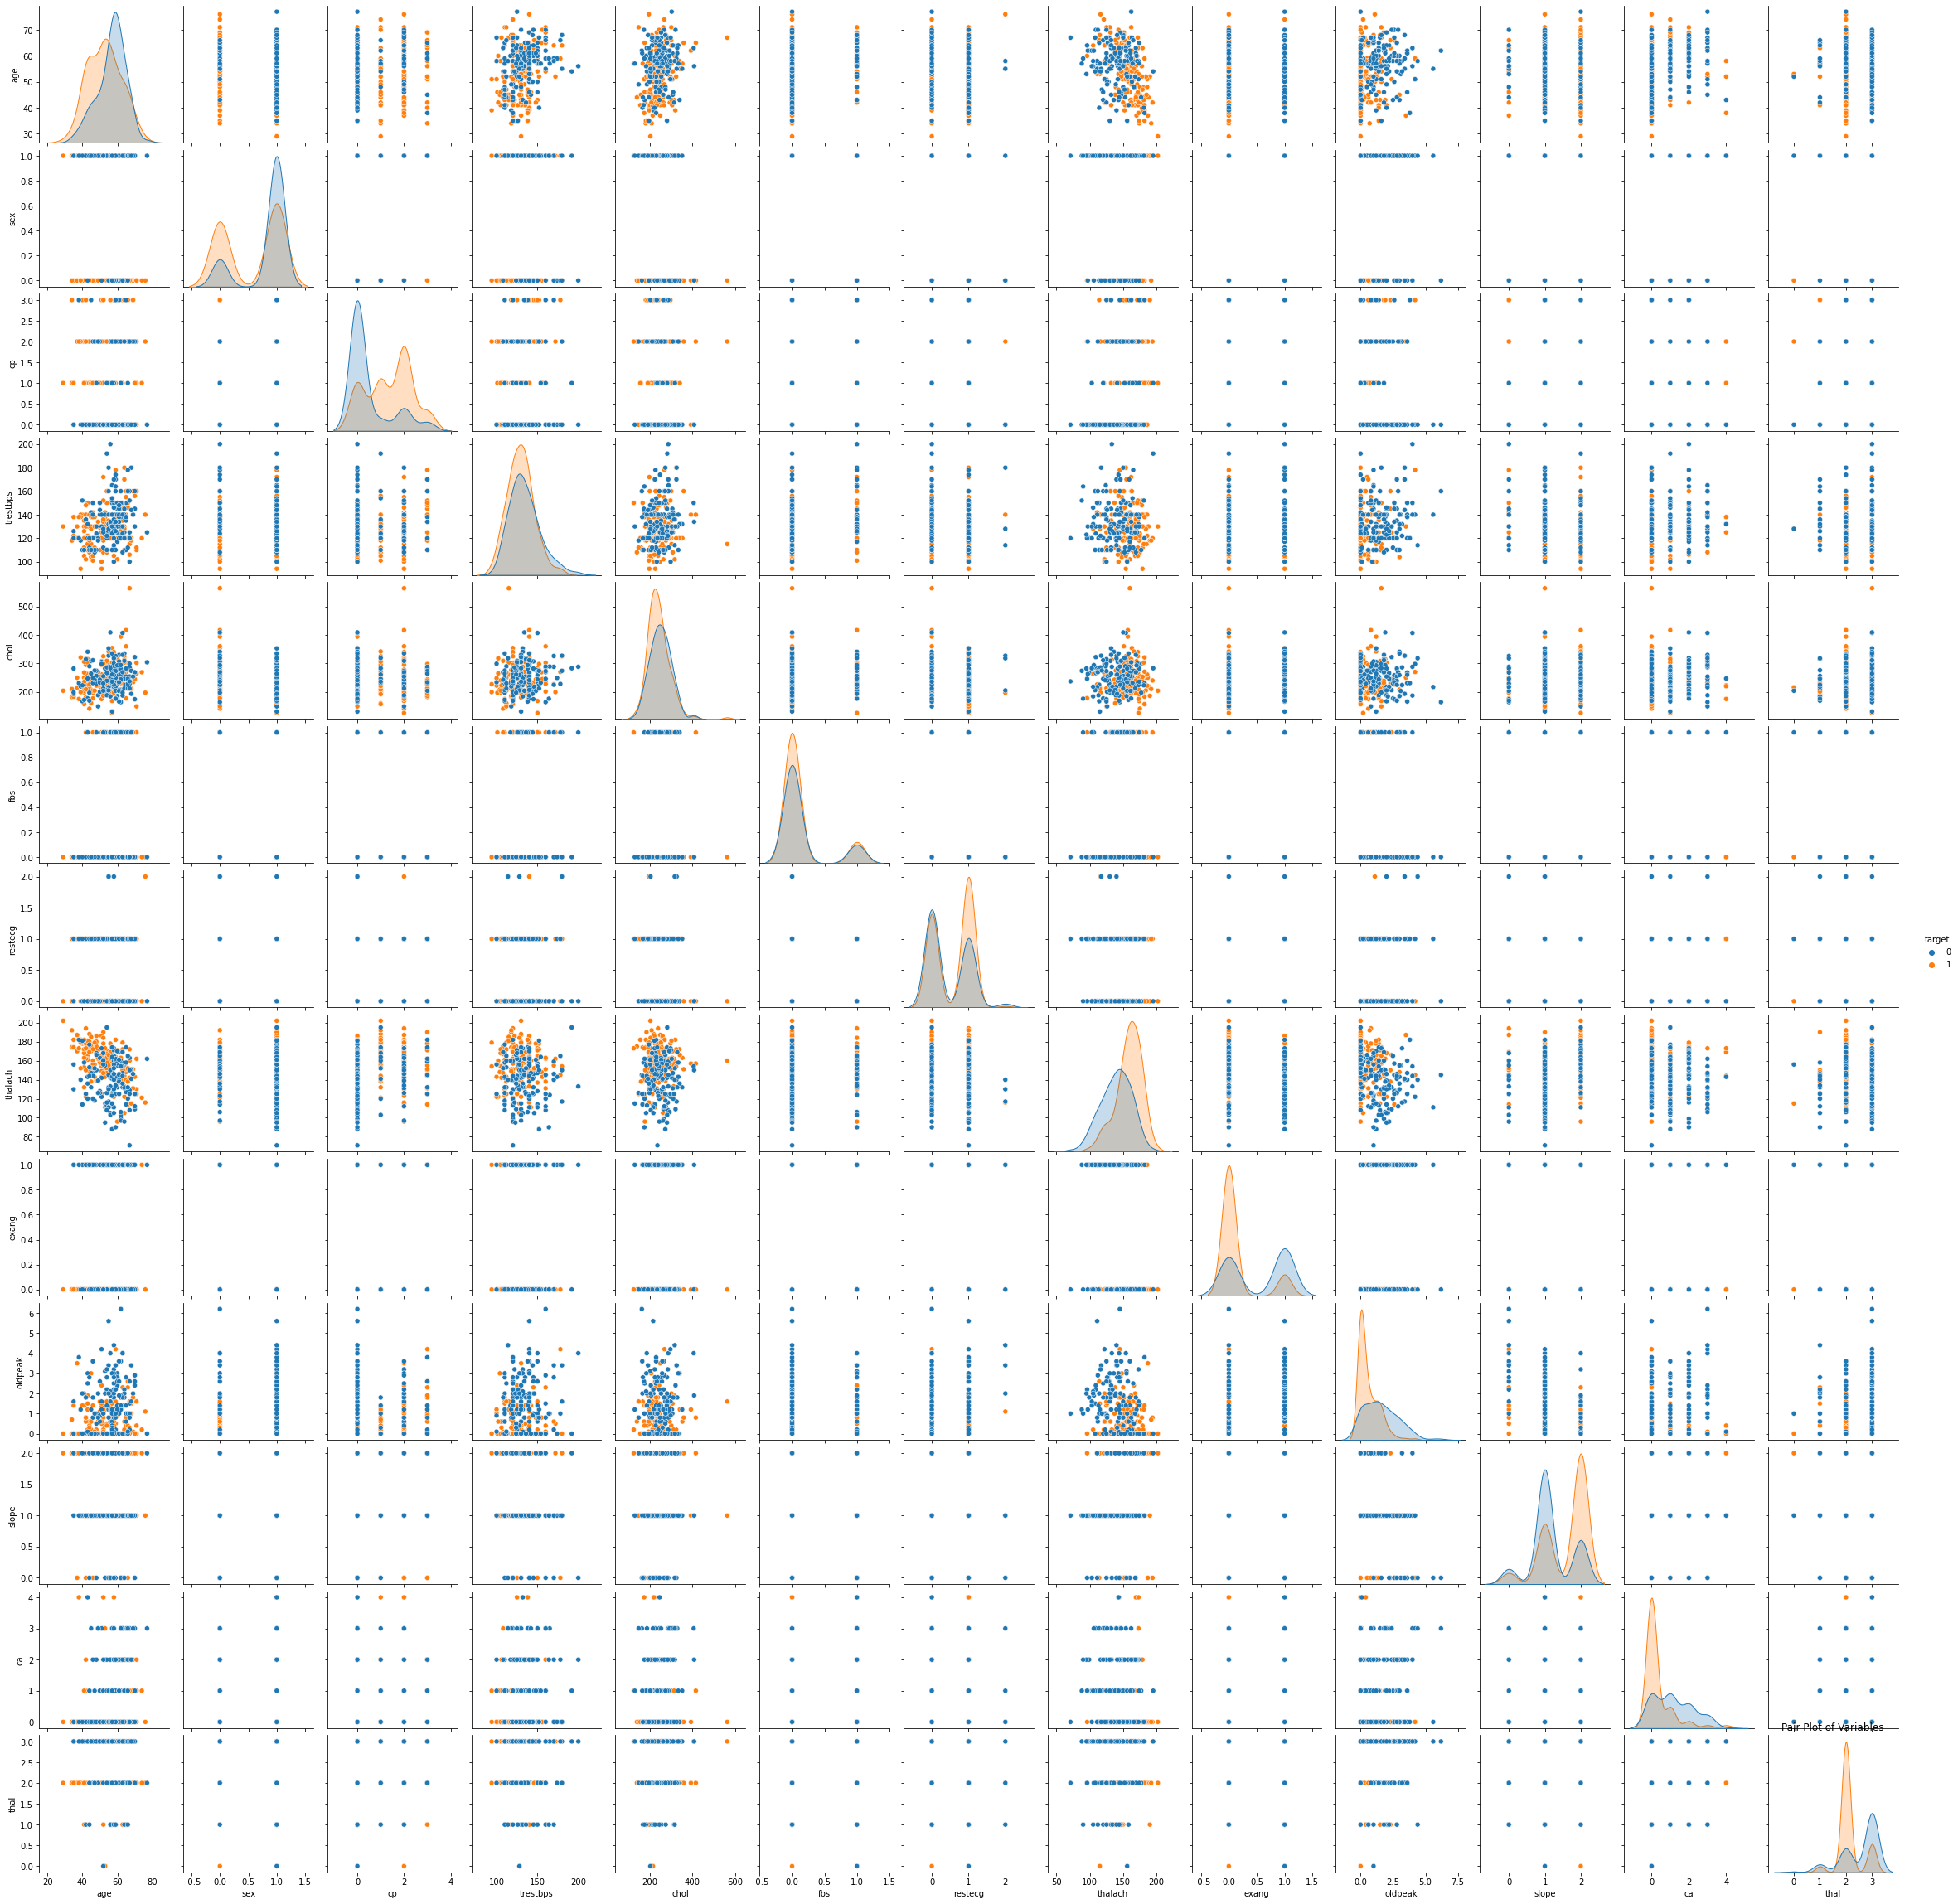

In [15]:
#Use a pair plot to understand the relationship between all the given variables.

sns.pairplot(data=data, hue='target')
plt.title('Pair Plot of Variables')
plt.show()


Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4949
Time:                        14:17:26   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3042      2.578      1.282      0.200      -1.748       8.357
age           -0.0015      0.

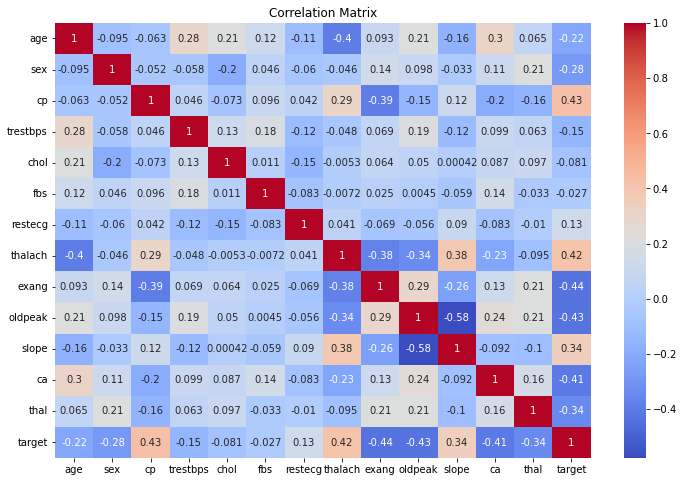

In [16]:
import statsmodels.api as sm

# Feature matrix and target variable
X = data.drop('target', axis=1)
y = data['target']

# Add constant column for statsmodels
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print model summary
print(result.summary())

# Perform correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
